In [79]:
import xarray as xr
from matplotlib import pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import pandas as pd

In [80]:
d = xr.open_dataset('./../Data/Fields/friction_coefficient.nc')
d['friction_c']
d2 = xr.open_dataset('./../Data/Fields/mask_grounded.nc')
d2['mask_grounded']
d3 = xr.open_dataset('./../Data/Fields/friction_c_calculated.nc')
d4 = xr.open_dataset('./../Data/Fields/bed.nc')
d5 = xr.open_dataset('./../Data/Fields/thickness.nc')

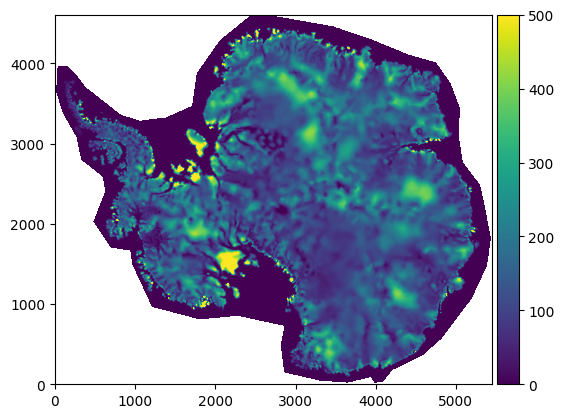

In [81]:
f,ax = plt.subplots(1,1)
im =ax.imshow(d['friction_c'].values,vmin=0,vmax=500,origin ='lower')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)



f.colorbar(im, cax=cax, orientation='vertical')

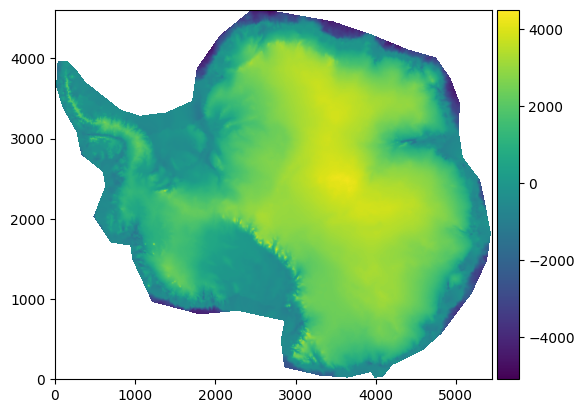

In [82]:
f,ax = plt.subplots(1,1)
im =ax.imshow(d2['mask_grounded'].values,origin ='lower')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)



f.colorbar(im, cax=cax, orientation='vertical')

In [83]:
m_fl = d2['mask_grounded'].values <0

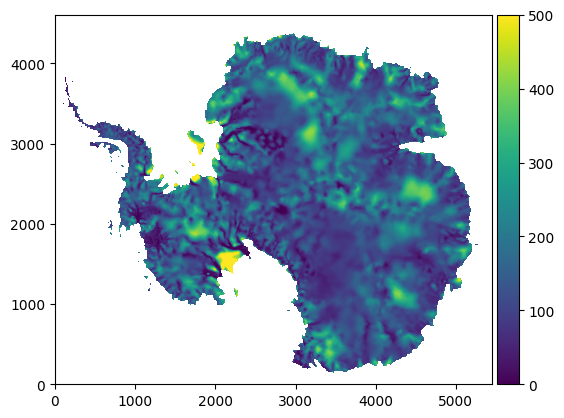

In [84]:

f,ax = plt.subplots(1,1)
gr=d['friction_c'].values.copy()
gr[m_fl] = np.nan
im =ax.imshow(gr,origin ='lower',vmin=0,vmax=500,)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)



f.colorbar(im, cax=cax, orientation='vertical')

In [85]:
# f,ax = plt.subplots(1,1)
# fl=d['friction_c'].values.copy()
# fl[~m_fl] = np.nan
# im =ax.imshow(fl,origin ='lower',vmin=0,vmax=5)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='5%', pad=0.05)



# f.colorbar(im, cax=cax, orientation='vertical')

### let us see where C from inversion may equal calculated friction coefficent
calculated frition coefficent was calculated as such:
friction_c_calculated=sqrt(md.materials.rho_ice*md.geometry.thickness.*(sslope)./(Neff.*vel/md.constants.yts));

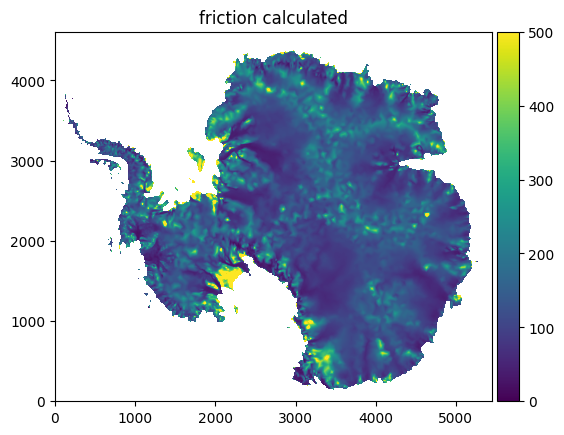

In [86]:
f,ax = plt.subplots(1,1)

gr_c[m_fl] = np.nan
rat = gr/gr_c
im =ax.imshow(gr_c,origin ='lower',vmin=0,vmax=500,)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

ax.set_title("friction calculated")

f.colorbar(im, cax=cax, orientation='vertical')

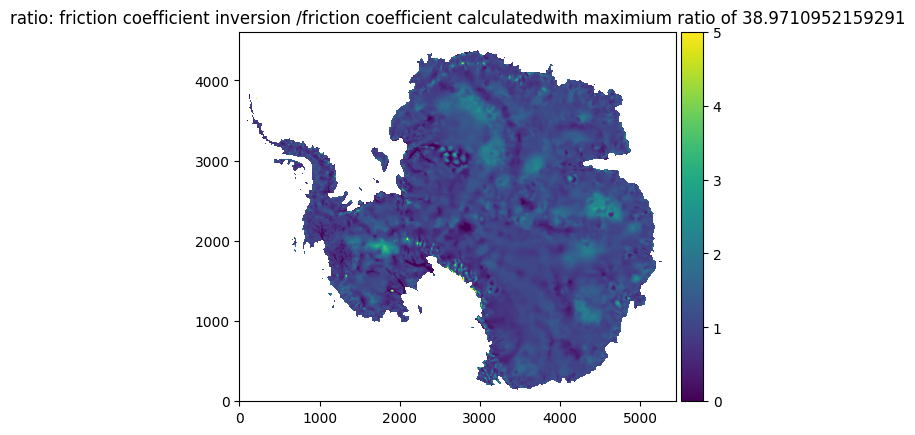

In [87]:
# + for grouned only
f,ax = plt.subplots(1,1)
gr=d['friction_c'].values.copy()
gr[m_fl] = np.nan
gr_c= d3['friction_c_calculated'].values.copy()
gr_c[m_fl] = np.nan
rat = gr/gr_c
im =ax.imshow(rat,origin ='lower',vmin =0,vmax=5)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)


ax.set_title('ratio: friction coefficient inversion /friction coefficient calculatedwith maximium ratio of '+str(np.nanmax(rat)))
f.colorbar(im, cax=cax, orientation='vertical')

### let look for areas below sea level only....

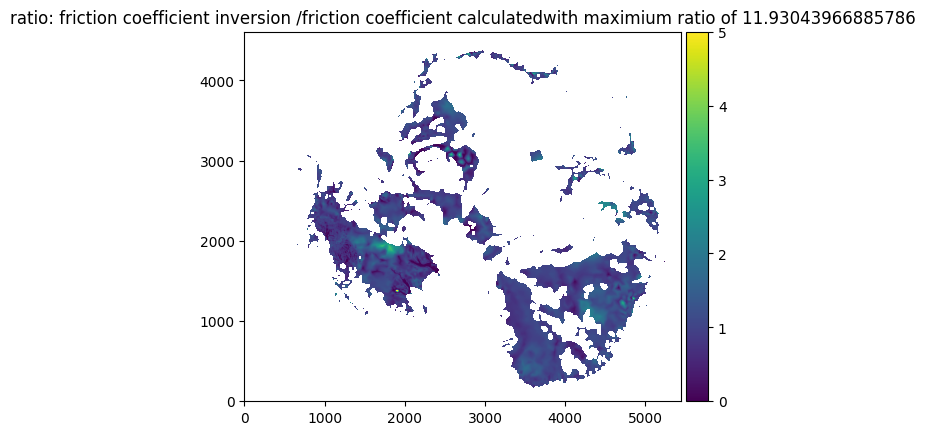

In [88]:
m_negbed = d4['bed'].values <0

# + for grouned only
f,ax = plt.subplots(1,1)

rat = gr/gr_c
rat[~m_negbed] = np.nan
im =ax.imshow(rat,origin ='lower',vmin =0,vmax=5)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)


ax.set_title('ratio: friction coefficient inversion /friction coefficient calculatedwith maximium ratio of '+str(np.nanmax(rat)))
f.colorbar(im, cax=cax, orientation='vertical')

## can we identify a pattern for the increased ratio?

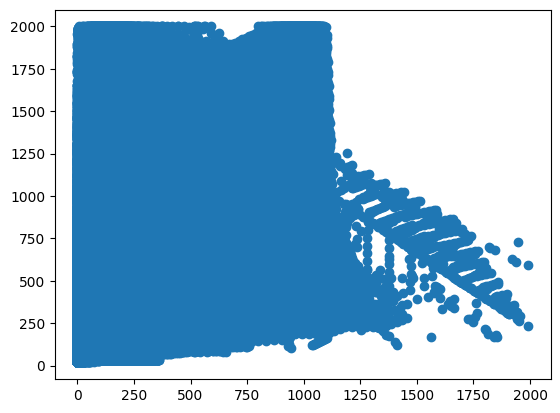

In [89]:
# + for grouned only
f,ax = plt.subplots(1,1)



ax.scatter(gr[m_negbed],gr_c[m_negbed])

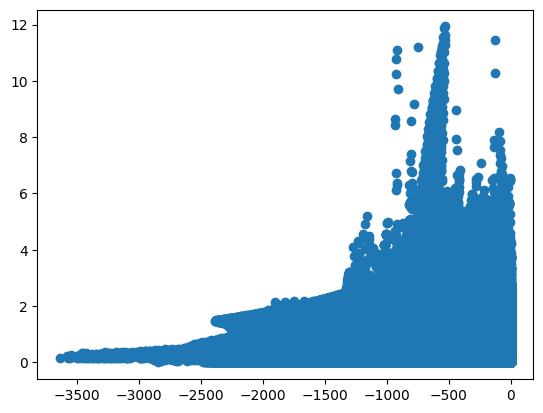

In [90]:

# + for grouned only
f,ax = plt.subplots(1,1)



ax.scatter(d4['bed'].values[m_negbed],rat[m_negbed])

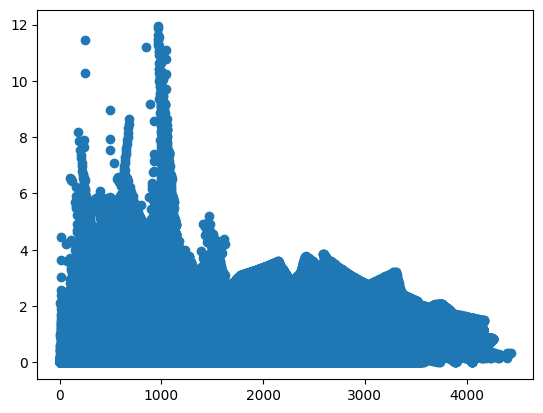

In [91]:
# + for grouned only
f,ax = plt.subplots(1,1)



ax.scatter(d5['thickness'].values[m_negbed],rat[m_negbed])

In [92]:
dic ={}
dic['ratio']= rat[m_negbed]
dic['bed']=d4['bed'].values[m_negbed]
dic['thickness']=d5['thickness'].values[m_negbed]
ds = pd.DataFrame.from_dict(dic)
ds =ds.dropna()
ds.head()

,ratio,bed,thickness
72680,0.102629,-92.444467,103.246180
73849,0.101678,-84.832357,99.727903
73850,0.105811,-81.410195,102.351976
73851,0.109779,-77.988033,104.976048
73852,0.113591,-74.565871,107.600121


In [93]:
y = ds['ratio']
X = ds[['bed', 'thickness']]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [95]:
# model evaluation
print(
'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
'mean_absolute_error : ', mean_absolute_error(y_test, predictions))


mean_squared_error :  0.161246040768506
mean_absolute_error :  0.2748720481993311


In [102]:
predictions.size

1653507

In [101]:
y_test.values.size

1653507

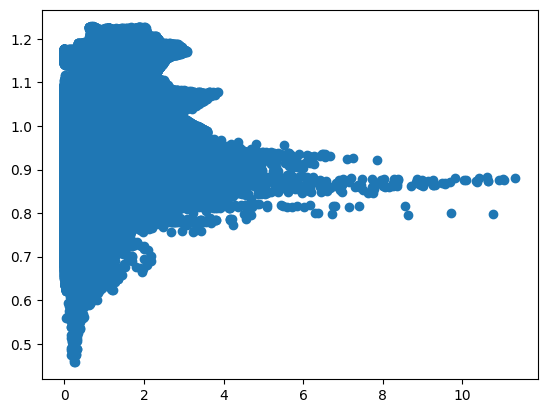

In [103]:
f,ax = plt.subplots(1,1)
ax.scatter(y_test.values, predictions)

In [78]:
model.coef_

array([2.32428832e-04, 8.18389266e-05])

In [ ]:
# + for grouned only
f,ax = plt.subplots(1,1)



ax.scatter(d4['bed'].values[m_negbed],rat[m_negbed])

In [20]:
rat[m_fl]

array([nan, nan, nan, ..., nan, nan, nan])

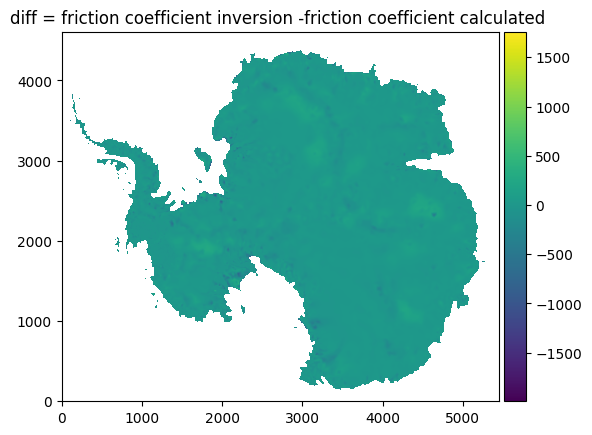

In [21]:
gf,ax = plt.subplots(1,1)

gr_c[m_fl] = np.nan
rat = gr -gr_c
im =ax.imshow(rat,origin ='lower')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)


ax.set_title("diff = friction coefficient inversion -friction coefficient calculated ")
f.colorbar(im, cax=cax, orientation='vertical')

In [12]:
np.nanmin(gr_c)

1.342566978666345

In [13]:
np.nanmin(gr)

0.04999999999999999

In [14]:
np.nanmax(rat)

1759.8456967211628

In [15]:
np.nanmin(rat)

-1992.769685772645